<a href="https://colab.research.google.com/github/abhimanyupandey1996/hotel-booking-analysis/blob/main/abhimanyu_kumar_pandey_hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - hotel booking analysis



##### **Project Type**    - EDA
##### **Contribution**    - individual
##### **Team Member 1 -Abhimanyu kumar pandey


# **Project Summary -**

In this project, I have attempted to analyze a hotel booking dataset and come up with some relevant conclusions about the factors that contribute to count of bookings. No personal information of customer is provided in this dataset. We started with importing various libraries which would come in handy and we mounted the drive and loaded the dataset after that we went for data overview and we realised that there were some null values which need to be treated to make our dataset analysis ready , then we did some data visualisation and based on that we found some business insights . Finally we gave some recommendations which may eventually help the company to grow.

# **GitHub Link -**

https://github.com/abhimanyupandey1996/hotel-booking-analysis

#### **Define Your Business Objective?**


Analyse the data on bookings of City Hotel and Resort Hotel to gain insights on the different factors that affect the booking. This is undertaken as an individual project.This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# ignore warnings
import warnings    
warnings.filterwarnings('ignore')

# Modules for dataframe and ndarrays and maths
import pandas as pd
import numpy as np
from datetime import datetime
import math
from scipy.stats import *


# visualisation packages
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(15,6),'figure.dpi':70})

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/project hotel/Hotel Bookings.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

31994


In [8]:
#deleting duplicate rows
df.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [9]:
#Checking Null Values
null_df= pd.DataFrame({"Total Values": df.shape[0] , "Total Null values": df.isnull().sum(),"%a of Null values" : round((df.isnull().sum()/ df.shape[0])*100 , 2) })
null_df.sort_values("Total Null values" , ascending = False)

,Total Values,Total Null values,%a of Null values
company,87396,82137,93.98
agent,87396,12193,13.95
country,87396,452,0.52
children,87396,4,0.00
reserved_room_type,87396,0,0.00
assigned_room_type,87396,0,0.00
booking_changes,87396,0,0.00
deposit_type,87396,0,0.00
hotel,87396,0,0.00
previous_cancellations,87396,0,0.00


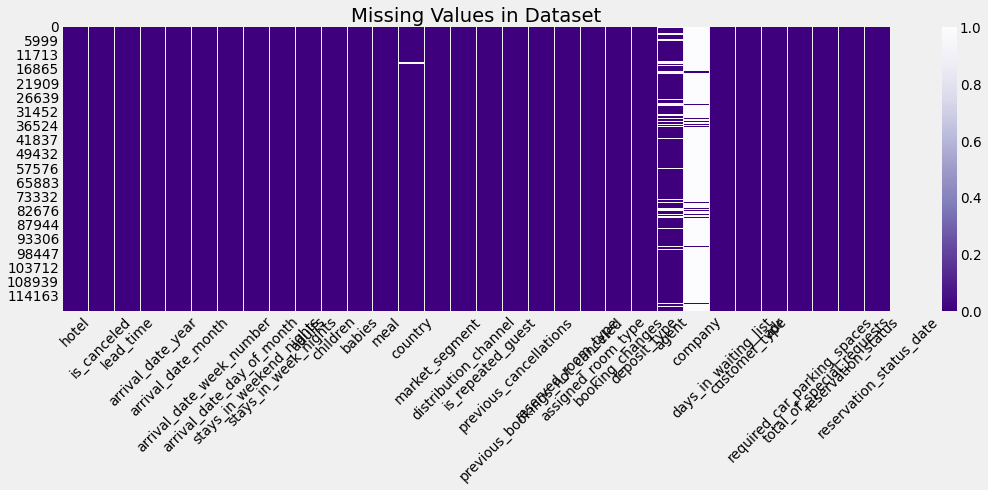

In [10]:
# Visualizing the missing values
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(),cbar=True,cmap="Purples_r")
plt.xticks(rotation= 45)
plt.title('Missing Values in Dataset')
plt.show()

### What did you know about your dataset?

* Total no. of rows: 119390
* No. of duplicate rows: 31994
* The dataframe contains 119390 rows of data.
Out of which 31,994 rows are duplicate rows, which is allready  removed.
* The dataframe contains 32 columns.
* Four columns have missing values.
* Some columns require conversion of datatypes.
* Additionally, new columns need to be added from existing ones to make analysis easier


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description 

The columns and the data it represents are listed below:

hotel : Name of the hotel (Resort Hotel or City Hotel)

is_canceled : If the booking was canceled (1) or not (0)

lead_time : Number of days before the actual arrival of the guests

arrival_date_year : Year of arrival date

arrival_date_month : Month of month arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

stays_in_week_nights : Number of weeknights (Monday to Friday) spent at the hotel by the guests.

adults : Number of adults among guests

children : Number of children among guests

babies : Number of babies among guests

meal : Type of meal booked

country : Country of guests

market_segment : Designation of market segment

distribution_channel : Name of booking distribution channel

is_repeated_guest : If the booking was from a repeated guest (1) or not (0)

previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type : Code of room type reserved

assigned_room_type : Code of room type assigned

booking_changes : Number of changes/amendments made to the booking

deposit_type : Type of the deposit made by the guest

agent : ID of travel agent who made the booking

company : ID of the company that made the booking

days_in_waiting_list : Number of days the booking was in the waiting list

customer_type : Type of customer, assuming one of four categories

adr : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces : Number of car parking spaces required by the customer

total_of_special_requests : Number of special requests made by the customer

reservation_status : Reservation status (Canceled, Check-Out or No-Show)

reservation_status_date : Date at which the last reservation status was updated

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
categorical_list =['hotel', 'is_canceled', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status']

In [14]:
# Check Unique Values for each variable.
print("Unique values in these categorical features: \n")
for i in categorical_list:
  print(f'Unique values in {i}---------->>  {df[i].unique()}')

Unique values in these categorical features: 

Unique values in hotel---------->>  ['Resort Hotel' 'City Hotel']
Unique values in is_canceled---------->>  [0 1]
Unique values in arrival_date_year---------->>  [2015 2016 2017]
Unique values in arrival_date_month---------->>  ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
Unique values in arrival_date_week_number---------->>  [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26]
Unique values in arrival_date_day_of_month---------->>  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Unique values in stays_in_weekend_nights---------->>  [ 0  1  2  4  3  6 13  8  5  7 12  9 16 18 19 10 14]
Unique values in stays_in_week_nights---------->>  [ 0  1  2  3  4  5 10 11  8  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 42 50 2

## 3. ***Data Wrangling***

### Data Wrangling Code

**company**

In [15]:
# dropping the column 'company'
df.drop(['company'], axis=1, inplace=True)

**agent**

In [16]:
# filling the missing values with mode
df['agent'].fillna(value = df.agent.mode()[0], inplace=True)

**countrty**

In [17]:
# filling missing values with 'Others'
df['country'].fillna(value = 'Others', inplace=True)

**children**

In [18]:
# filling the missing values with 0
df['children'].fillna(value = 0, inplace=True)

datatype **conversion**

In [19]:
# converting the datatype of children and agent to int64
df[['children', 'agent']] = df[['children', 'agent']].astype('int64')

In [20]:
# converting the datatype of reservation_status_date to date
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')

Other Manipulations(New Columns)

In [21]:
# Adding total stays in nights
df['total_stays_in_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [22]:
# Adding revenue
df['revenue'] = df['total_stays_in_nights'] * df['adr']

In [23]:
# Adding total number of guests as column
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [24]:
# Adding column which shows whether reserved room type is the same as assigned room type
df['is_reserved_room_type_assigned'] =df.apply(lambda x: 'same room type assigned' if x['reserved_room_type'] == x['assigned_room_type'] 
                                                                                                   else 'different room type assigned', axis=1)

In [25]:
# changing the bool data from int to string for easy representation
df['is_canceled'] = df['is_canceled'].replace([1, 0], ['cancelled', 'not cancelled'])
df['is_repeated_guest'] = df['is_repeated_guest'].replace([1, 0], ['repeated guest', 'not repeated guest'])

### What all manipulations have you done and insights you found?

* Dropping the column value with Company
* Filling the missing values with mode
* filling missing values with 'Others'
* converting the datatype of children and agent to int64
* converting the datatype of reservation_status_date to date
* Adding total stays in nights
* Adding revenue
* Adding total number of guests as column
* Adding column which shows whether reserved room type is the same as assigned room type
* changing the bool data from int to string for easy representation

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [26]:
# defining a UDF to extract dataframe for univariate analysis
def get_count_from_column(df, column_label):
  df_grpd = df[column_label].value_counts()
  df_grpd = pd.DataFrame({'index':df_grpd.index, 'count':df_grpd.values})
  return df_grpd

# plot a pie chart from grouped data
def plot_pie_chart_from_column(df, column_label):
  df_grpd = get_count_from_column(df, column_label)

  fig, ax = plt.subplots(figsize=(14, 6))
  ax.pie(df_grpd.loc[:, 'count'], labels=df_grpd.loc[:, 'index'], autopct='%1.2f%%', startangle=90)
  ax.axis('equal')
  plt.show()

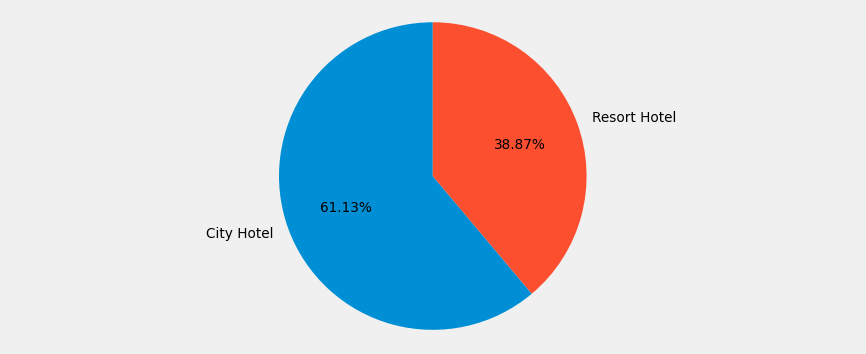

In [27]:
# plot a pie chart to show % of bookings from each hotel
plot_pie_chart_from_column(df, 'hotel')

##### 1. Why did you pick the specific chart?

We have picked pie chart since the variable used is categorical and have binary categories , hence pie chart will be appropriate for univariate analysis.

##### 2. What is/are the insight(s) found from the chart?

Number of bookings for City Hotel is 1.6 times more than that of Resort Hotel. City Hotel seems to be more preferred among travellers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the frequency of city hotels and resort hotels , stake holders and gauge the traction of the customers and based on that they can make marketing strategies to improve their business.


#### Chart - 2

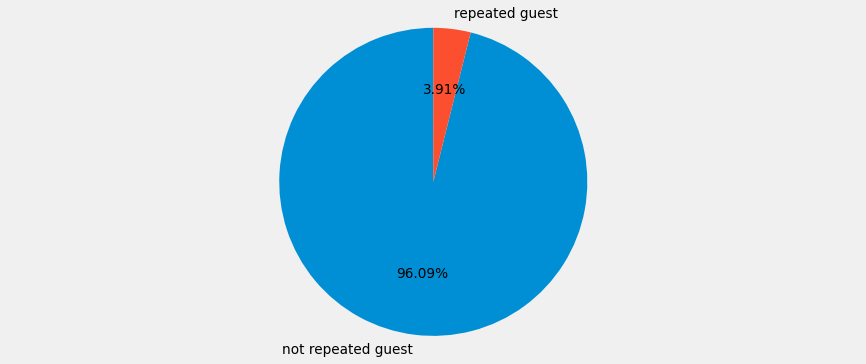

In [28]:
# plot a pie chart to show % of repeated guests
plot_pie_chart_from_column(df, 'is_repeated_guest')

##### 1. Why did you pick the specific chart?

We have picked pie chart since the variable used is categorical and have binary categories , hence pie chart will be appropriate for univariate analysis.

##### 2. What is/are the insight(s) found from the chart?

Only a very small percentage (around 4%) of bookings are made by repeated guests.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the above chart hotle owners can discover that the repeated guests are very less that means their services are not upto the level that it can retain their customers.

#### Chart - 3

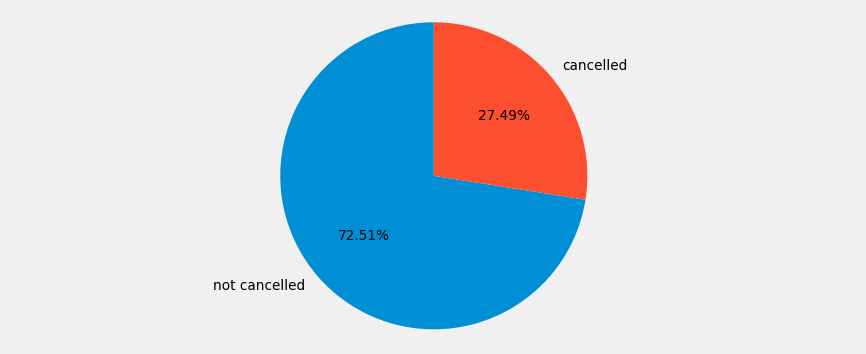

In [29]:
# plot a pie chart to show % of cancelled bookings
plot_pie_chart_from_column(df, 'is_canceled')

##### 1. Why did you pick the specific chart?

We have picked pie chart since the variable used is categorical and have binary categories , hence pie chart will be appropriate for univariate analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that around one-fourth of the total bookings get cancelled.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since 30% of the customers are cancelling their bookings which is a big number , hotel owners need to find the reasons of the cancelling so that they can improve on that part.

#### Chart - 4

Text(0.5, 1.0, 'Favourite food type')

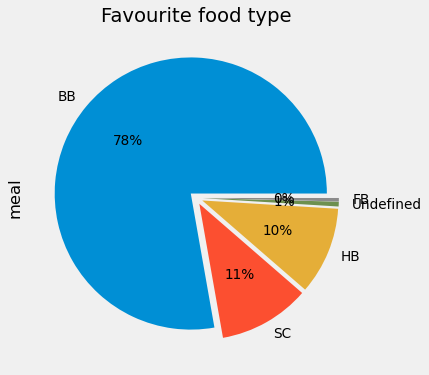

In [30]:
#plotting pie chart for various food types
meal_typ =df['meal'].value_counts()
meal_typ.plot.pie(autopct='%1.0f%%',explode = [0.05]*5)
plt.title('Favourite food type')

##### 1. Why did you pick the specific chart?

We have picked pie chart since the variable used is categorical and have multiple categories , hence pie chart will be appropriate for univariate analysis.

##### 2. What is/are the insight(s) found from the chart?

BB --bed and breakfast. HB--half board (in which breakfast and dinner are included.) FB--full board (in which breakfast, lunch and dinner are included.)

AS we can see 78% of people prefer 'BB' type meal.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since large chunk of customers only requires bedding facility when they board a hotel that means they are least concernd about the food so special category for only bedding facility should be started for better traction.

#### Chart - 5

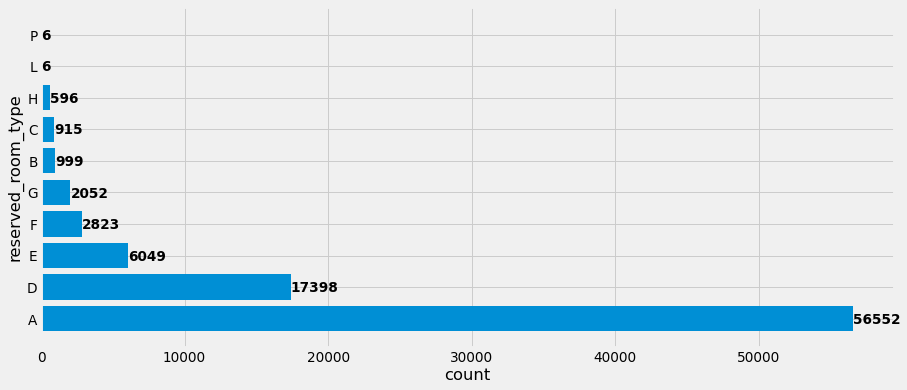

In [31]:
# define a function to plot a horizontal bar graph from grouped count values
# so that it can be used in the later stages also

def plot_horz_bar_graph_from_grpd_column(df_grpd, column_label):
  fig, ax = plt.subplots(figsize=(14, 6))
  bars = ax.barh(df_grpd['index'], df_grpd['count'])
  plt.ylabel(column_label)
  plt.xlabel('count')

  for i, v in enumerate(df_grpd['count']):
    ax.text(v + 3, i - 0.15, str(v), fontweight='bold')

def plot_horz_bar_graph_from_column(df, column_label):
  df_grpd = get_count_from_column(df, column_label)
  plot_horz_bar_graph_from_grpd_column(df_grpd, column_label)

# plot a horizontal bar graph to compare the number of bookings made for each room type
plot_horz_bar_graph_from_column(df, 'reserved_room_type') 

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables

##### 2. What is/are the insight(s) found from the chart?

Room Type A has around 25000 more bookings than all other room types combined. So Room Type A is the most preferred room type among travellers.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since we know the the demand of a few types of room like P and L are quite less hence hotel owners can stop investing in these fascilities rather they should focus on the rooms which are high in demand

#### Chart - 6

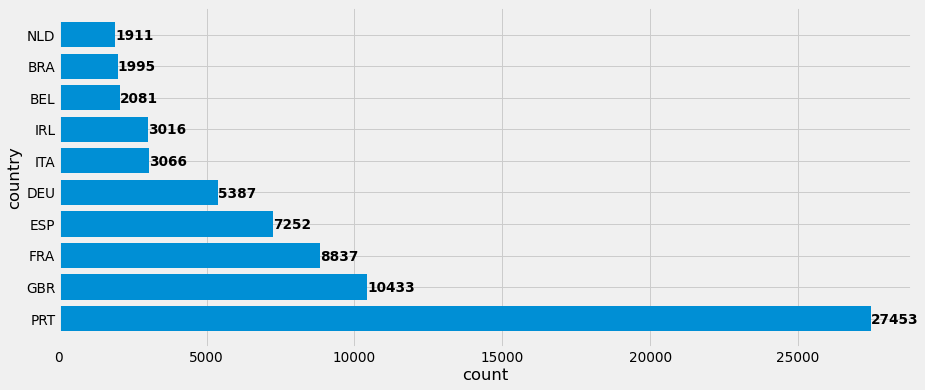

In [32]:
# plot a horizontal bar graph to compare the number of bookings made from each country
country_df_grpd = get_count_from_column(df, 'country')

# since the number of unique countries is 178,
# lets consider only the top 10 countries
country_df_grpd = country_df_grpd.sort_values(by='count', ascending=False)[:10]

# plot a horizontal bar graph with merged dataframe
plot_horz_bar_graph_from_grpd_column(country_df_grpd, 'country')

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables

##### 2. What is/are the insight(s) found from the chart?

most of the guest are from the portugal

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since we know the the demand of a few types of room like P and L are quite less hence hotel owners can stop investing in these fascilities rather they should focus on the rooms which are high in demand

#### Chart - 7

Text(0.5, 1.0, ' bookings by year')

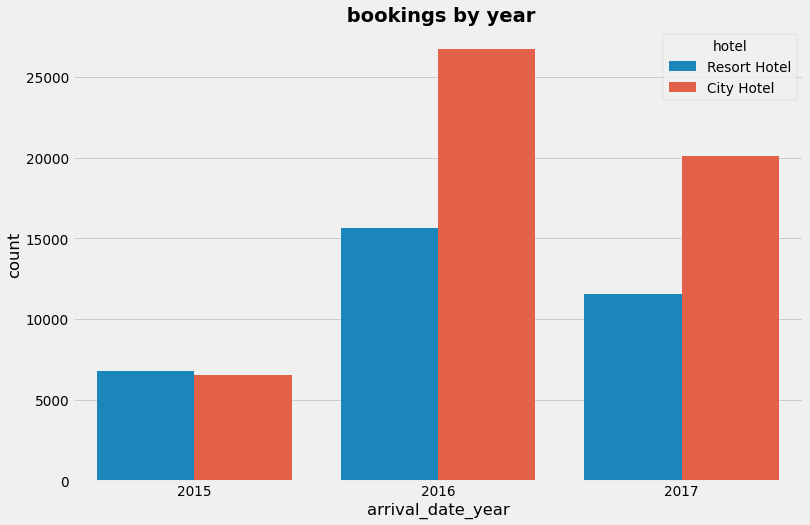

In [33]:
#plotting bar chart for bookings by year in city and resort hotel
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months, ordered=True)
plt.figure(figsize = (12,8))
sns.countplot(x= 'arrival_date_year', data= df, hue= 'hotel').set_title (' bookings by year',fontweight="bold", size=20)

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables

##### 2. What is/are the insight(s) found from the chart?

Bookings for city hotels are higher than resort hotels over the years and in year 2016 the bookings for both the hotels were maximum.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By knowing the analysis above hotel owners can identify the pattern and provide promotional discounts to attract customers in specific seasons.

#### Chart - 8

Text(0.5, 1.0, 'Number of stays on weekday nights')

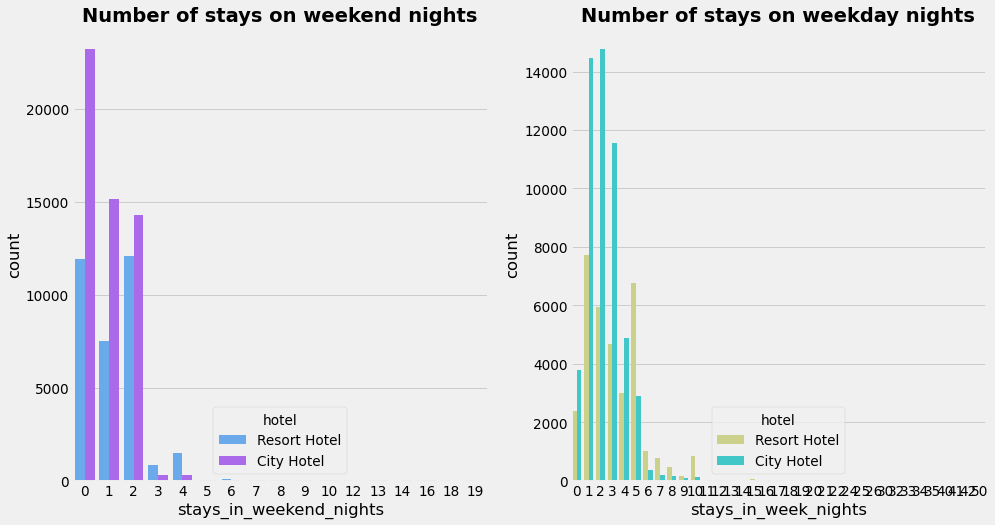

In [34]:
#plotting bar chart for weekend and weekdays stays
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=df, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables



##### 2. What is/are the insight(s) found from the chart?

city hotels have more number of stays irrespective of week or weekend stays

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is clear that on weekends the bookings are higher as compared to the weekdays that means special discounts should not be provided on weekends due to high demand.

#### Chart - 9

Text(0.5, 1.0, 'Booking preferred with deposite type')

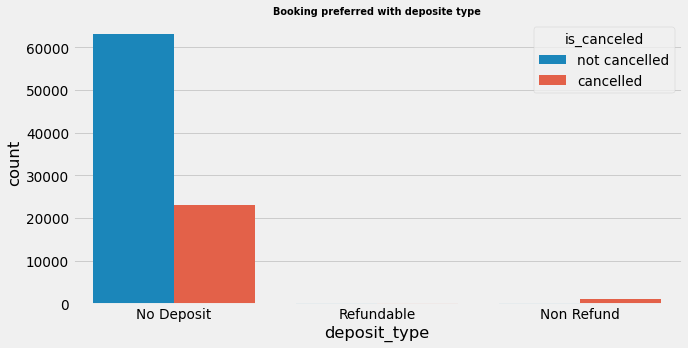

In [35]:
#plotting bar chart for deposite type
plt.figure(figsize = (10,5))
sns.countplot(x='deposit_type',data=df,hue ='is_canceled')
plt.title('Booking preferred with deposite type',fontweight ="bold",size =10)

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables

##### 2. What is/are the insight(s) found from the chart?

As expected , Most Bookings are done with 'No deposite' and most cancellations are also in 'no deposit' bookings. It is a surprise to see cancellations with 'Non-refundable' bookings

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

the hotels which are providing the non deposit fascilities are high in demand which is obvious So owners should mark this trend and generalise this system. Non refundable system should only be for the cotomers who needs the room urgently.

#### Chart - 10 - Correlation Heatmap

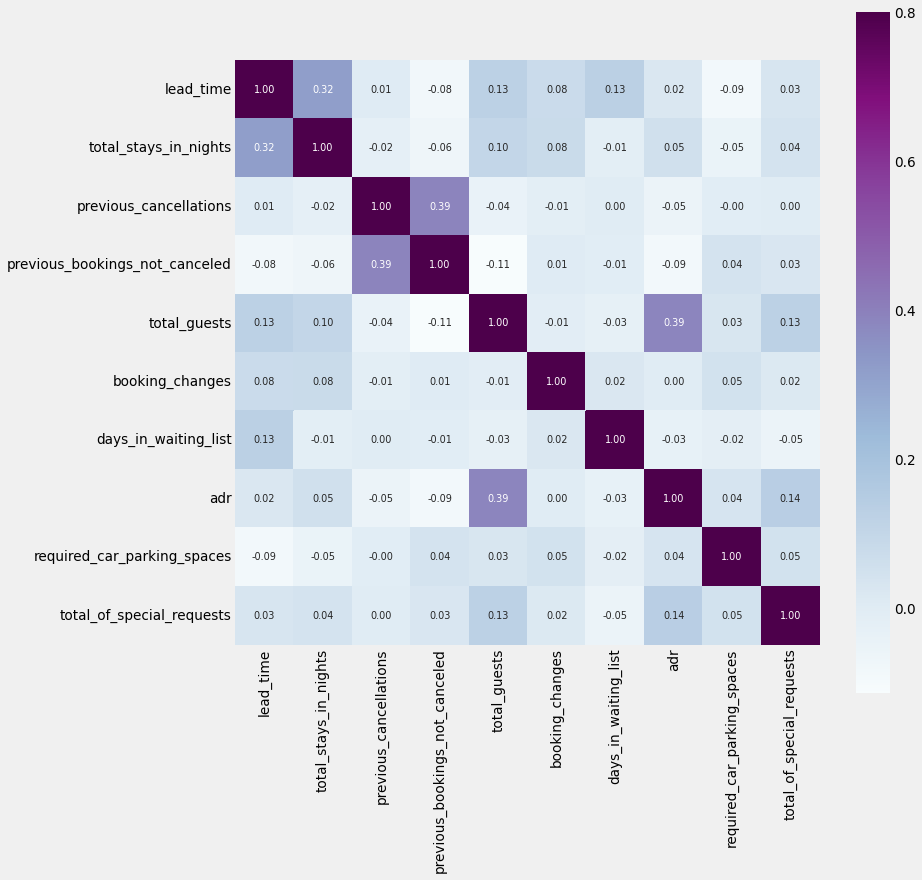

In [36]:
# plot a correlation heat map to show the relationship between various numerical
corrmat = df[['lead_time', 'total_stays_in_nights', 'previous_cancellations', 'previous_bookings_not_canceled', 'total_guests',
                    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']].corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, annot = True, fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True, cmap="BuPu");

##### 1. Why did you pick the specific chart?

Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships. In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships

##### 2. What is/are the insight(s) found from the chart?

We can see that lead time and length of stay have a good correlation with each other. Thus we may conclude that generally visits planned with longer stays are booked earlier than those planned with shorter stay. ADR and total number of guests also have good correlation with each other. This may be because of the increase in expenditure with the increase in the count of guests.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

based on the analysis above the we can give following suggestions to the business owners 
* By understanding the frequency of city hotels and resort hotels , stake holders and gauge the traction of the customers and based on that they can make marketing strategies to improve their business.
* From the above chart hotle owners can discover that the repeated guests are very less that means their services are not upto the level that it can retain their customers.
* Since 30% of the customers are cancelling their bookings which is a big number , hotel owners need to find the reasons of the cancelling so that they can improve on that part.
* Since large chunk of customers only requires bedding facility when they board a hotel that means they are least concernd about the food so special category for only bedding facility should be started for better traction.
* Since we know the the demand of a few types of room like P and L are quite less hence hotel owners can stop investing in these fascilities rather they should focus on the rooms which are high in demand
* Since we know the the demand of a few types of room like P and L are quite less hence hotel owners can stop investing in these fascilities rather they should focus on the rooms which are high in demand
* By knowing the analysis above hotel owners can identify the pattern and provide promotional discounts to attract customers in specific seasons.
* the hotels which are providing the non deposit fascilities are high in demand which is obvious So owners should mark this trend and generalise this system. Non refundable system should only be for the cotomers who needs the room urgently.


# **Conclusion**

Based on the exploratory data analysis we came up with the following business insights:
* Number of bookings for City Hotel is 1.6 times more than that of Resort Hotel. City Hotel seems to be more preferred among travellers.
* Only a very small percentage (around 4%) of bookings are made by repeated guests.
* We can see that around one-fourth of the total bookings get cancelled.
* BB --bed and breakfast. HB--half board (in which breakfast and dinner are included.) FB--full board (in which breakfast, lunch and dinner are included.)

AS we can see 78% of people prefer 'BB' type meal.

* most of the guest are from the portugal
* Room Type A has around 25000 more bookings than all other room types combined. So Room Type A is the most preferred room type among travellers.
* Bookings for city hotels are higher than resort hotels over the years and in year 2016 the bookings for both the hotels were maximum.
* city hotels have more number of stays irrespective of week or weekend stays
* As expected , Most Bookings are done with 'No deposite' and most cancellations are also in 'no deposit' bookings. It is a surprise to see cancellations with 'Non-refundable' bookings
* We can see that lead time and length of stay have a good correlation with each other. Thus we may conclude that generally visits planned with longer stays are booked earlier than those planned with shorter stay. ADR and total number of guests also have good correlation with each other. This may be because of the increase in expenditure with the increase in the count of guests. 

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***